In [1]:
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

선형회귀


In [2]:
df=pd.read_csv('https://bit.ly/perch_csv')
perch_full=df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [4]:
df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [5]:
perch_weight = np.array(
        [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
        110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
        130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
        197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
        514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
        820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
        1000.0, 1000.0]
        )

In [6]:
# target
df['weight']=perch_weight

In [7]:
df

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0
5,18.0,5.22,3.32,100.0
6,18.7,5.20,3.12,78.0
7,19.0,5.64,3.05,80.0
8,19.6,5.14,3.04,85.0
9,20.0,5.08,2.77,85.0


In [8]:
train_input,test_input,train_target,test_target=train_test_split(
    perch_full,perch_weight,random_state=42
)

train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [9]:
# 데이터 훈련
lr=LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [10]:
lr.score(train_input,train_target)

0.9559326821885706

In [11]:
lr.score(test_input,test_target)

0.8796419177546367

In [12]:
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [13]:
train_input.shape

(42, 3)

### 특성을 추가해서 모델 적용 -Feature 컬럼

In [14]:
# degree=2
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3,5]])
poly.transform([[2,3,5]])

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.]])

In [15]:
# 특성을 추가해서 모델 적용 -Feature 컬럼
# <<<<<<<<<<<<<<<<<<<<  include_bias=False은 1값이 사라진다   >>>>>>>>>>>>>>>
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly =poly.transform(train_input)
test_poly = poly.transform(test_input)


In [16]:
lr=LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [17]:
df.columns

Index(['length', ' height', ' width', 'weight'], dtype='object')

In [18]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [19]:
# 효율이 더 올라갔다..
lr.score(test_poly,test_target)

0.9714559911594125

In [20]:
# 특성을 추가해서 모델 적용 -Feature 컬럼
# <<<<<<<<<<<<<<<<<<<<  include_bias=False은 1값이 사라진다   >>>>>>>>>>>>>>>
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly =poly.transform(train_input)
test_poly = poly.transform(test_input)

In [21]:
lr=LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [22]:
train_poly.shape

(42, 55)

In [23]:
lr.score(train_poly,train_target)

0.9999999999997232

In [24]:
lr.score(test_poly,test_target)

-144.40564483377855

#### 릿지회귀 라쏘회귀
#### 표준화 작업을 해줘야 한다. 꼭꼭!!!!!!!!!!!!!!!!!!!
#### (데이터-평균)/표준편차

In [25]:
#  자동으로 해주는게있음
from sklearn.preprocessing import StandardScaler #표준화작업

#표준화작업
ss= StandardScaler()
ss.fit(train_poly) #표준화작업 적용

train_scale = ss.transform(train_poly)
test_scale = ss.transform(test_poly)

In [26]:
#릿지규제(회귀) # 막 꺽이는거 방지
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scale,train_target)

Ridge()

In [27]:
ridge.score(train_scale,train_target)

0.9896101671037343

In [28]:
ridge.score(test_scale,test_target)

0.9790693977615387

In [29]:
# 선형회귀
# 과대적합
# 특성값 추가
# 규제

In [30]:
# 릿지회귀에서도 강도를 어느정도로 할지에 따라,예측률이 높아지는 형태가 나옴.
# Ridge(alpha=1) -> 추가적으로 늘려본다.
# for문을 사용해서 alpha값을 조정

# 그래프 적용을 위한 배열
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100] #총 사이가 0.001~100까지 형태 적용해서 예측률 뽑아내기


for alpha in alpha_list:
    # 규제를 적용한 훈련
    ridge = Ridge(alpha=alpha) #0.001,0.01,0.1,1,10,100
    ridge.fit(train_scale,train_target)
    train1 = ridge.score(train_scale,train_target)
    test1 = ridge.score(test_scale,test_target)
    train_score.append(train1) # 리스트에 추가
    test_score.append(test1) # 리스트에 추가

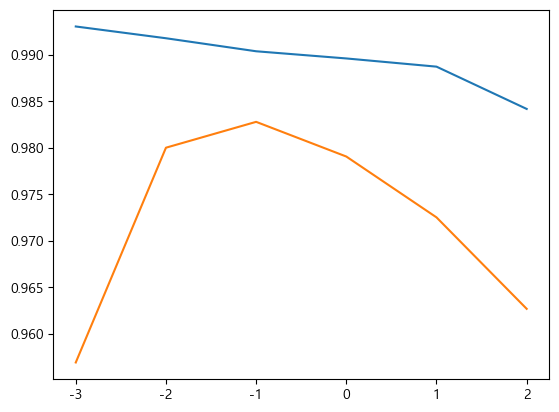

In [31]:
# x축 눈근 적용
# g1=[1,2,3,4,5,6]
g1 =np.log10(alpha_list)
plt.plot(g1,train_score)
plt.plot(g1,test_score)

Ridge(alpha=0.1) 알파값 0.1조정 후 다시 학습

In [32]:
ridge = Ridge(alpha=0.1) 
ridge.fit(train_scale,train_target)

Ridge(alpha=0.1)

In [33]:
print(ridge.score(train_scale,train_target))
print(ridge.score(test_scale,test_target))

0.9903815817570367
0.9827976465386928


In [34]:
kn.predict()

NameError: name 'kn' is not defined